## Draw GPS Trace of Penguin Data

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [146]:
data = pd.read_csv("penguin_combined_trace.csv")
print(len(data))

3560800


In [147]:
data_1 = data.iloc[1:] 
print(len(data_1))
list(data.columns.values)

3560799


['time index',
 'Acc_x',
 'Acc_y',
 'Acc_z',
 'Mag_x',
 'Mag_y',
 'Mag_z',
 'Temp, C',
 'Pressure, bar',
 'Latitude',
 'Longitude',
 'Altitude']

In [148]:
df_GPS = data_1[['Latitude','Longitude','Altitude']]
print(len(df_GPS))

3560799


In [149]:
del data, data_1

#### Convert GPS to meters

In [150]:
x_nan = np.array(df_GPS['Latitude'])
y_nan = np.array(df_GPS['Longitude'])
z_nan = np.array(df_GPS['Altitude'])

In [151]:
x = []
y = []
z = []
GPS_fix = []

for i in range(len(x_nan)):
    if math.isnan(x_nan[i]) == False:
        x_fix = x_nan[i]
        y_fix = y_nan[i]
        z_fix = z_nan[i]
        GPS_fix.append(True)
    else:
        GPS_fix.append(False)
    x.append(x_fix)
    y.append(y_fix)
    z.append(z_fix)
print(x[0:10])

[-42.132866, -42.132866, -42.132866, -42.132866, -42.132866, -42.132866, -42.132866, -42.132866, -42.132866, -42.132866]


In [152]:
del x_nan, y_nan, z_nan

In [153]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

R = 6378388.0 + z # m
arc= 2.0*np.pi*R/360.0 # m/°
dx = arc * np.cos(x*np.pi/180.0) * np.hstack((0.0, np.diff(y))) # in m
dy = arc * np.hstack((0.0, np.diff(x))) # in m
dz = np.hstack((0.0, np.diff(z)))

mx = np.cumsum(dx)
my = np.cumsum(dy)
mz = np.cumsum(dz)

print(GPS_fix[0:10])
# ds = np.sqrt(dx**2+dy**2+dz**2)
# GPS=np.hstack((True, (np.diff(ds)>0.0).astype('bool'))) # GPS Trigger for Kalman Filter

[True, False, False, False, False, False, False, False, False, False]


#### JUST TO VISUALIZE, DROPPED ALL NAN

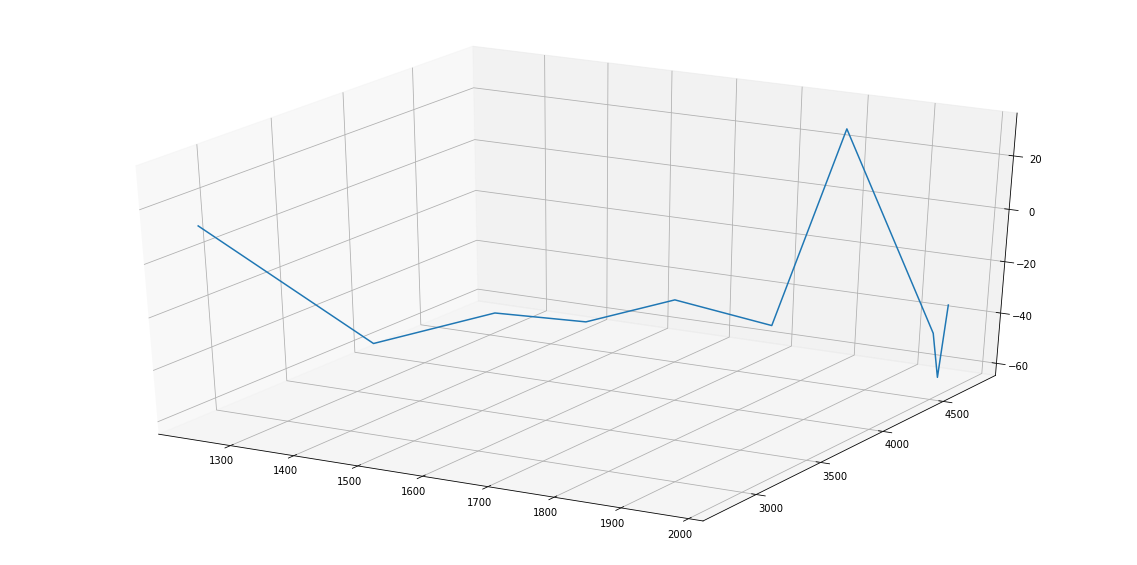

In [154]:

fx = df_GPS['Latitude'].dropna()
fy = df_GPS['Longitude'].dropna()
fz = df_GPS['Altitude'].dropna()

fx = np.array(fx)
fy = np.array(fy)
fz = np.array(fz)

R = 6378388.0 + fz # m
arc= 2.0*np.pi*R/360.0 # m/°
fdx = arc * np.cos(fx*np.pi/180.0) * np.hstack((0.0, np.diff(fy))) # in m
fdy = arc * np.hstack((0.0, np.diff(fx))) # in m
fdz = np.hstack((0.0, np.diff(fz)))

fmx = np.cumsum(fdx)
fmy = np.cumsum(fdy)
fmz = np.cumsum(fdz)


fig = plt.figure(figsize=(20,10))
plot_3d = fig.gca(projection='3d')
s = 390
e = 400
plot_3d.plot(fmx[s:e], fmy[s:e], fmz[s:e])

In [155]:
GPS_index = np.where(GPS_fix)[0][s:e]
print(GPS_index)

print(GPS_index[0])
print(GPS_index[-1])

[443176 444898 446147 447396 448559 449807 451100 452564 453942 455234]
443176
455234


## Blender data

In [156]:
data = pd.read_csv("penguin_combined_trace.csv")
print(len(data))

3560800


In [157]:
data_1 = data.iloc[GPS_index[0]:GPS_index[-1]] 
print(len(data_1))
list(data.columns.values)
df_GPS = data_1[['Latitude','Longitude','Altitude']]
print(len(df_GPS))

12058
12058


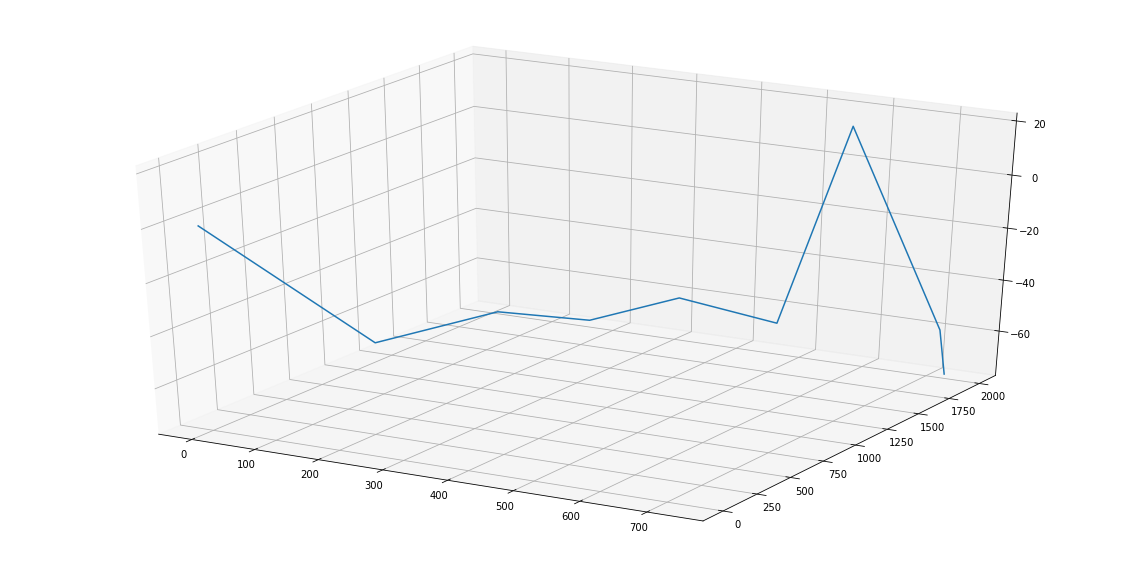

In [158]:
fx = df_GPS['Latitude'].dropna()
fy = df_GPS['Longitude'].dropna()
fz = df_GPS['Altitude'].dropna()

fx = np.array(fx)
fy = np.array(fy)
fz = np.array(fz)

R = 6378388.0 + fz # m
arc= 2.0*np.pi*R/360.0 # m/°
fdx = arc * np.cos(fx*np.pi/180.0) * np.hstack((0.0, np.diff(fy))) # in m
fdy = arc * np.hstack((0.0, np.diff(fx))) # in m
fdz = np.hstack((0.0, np.diff(fz)))

fmx = np.cumsum(fdx)
fmy = np.cumsum(fdy)
fmz = np.cumsum(fdz)


fig = plt.figure(figsize=(20,10))
plot_3d = fig.gca(projection='3d')
plot_3d.plot(fmx, fmy, fmz)

In [159]:
print(len(fmx))
GPS_index = np.where(GPS_fix)[0][s:e]

x = fmx
y = fmy
z = fmz

coor = []

for i in range(len(x)):
    coor.append((x[i],y[i],z[i]))

print(len(coor))
# write to a file 
filename = open("coordinate_from_penguin.txt","w")
for i in range(len(coor)):
    print(x[i], y[i], z[i] ,file = filename)
    print(x[i], y[i], z[i] ,file = filename)
    print(x[i], y[i], z[i] ,file = filename)
    print(x[i], y[i], z[i] ,file = filename)
    print(x[i], y[i], z[i] ,file = filename)
filename.close()


9
9


In [160]:
###############################Checking the

In [1103]:
filename = open("path_output_from_blender.txt")
prev_val = 0.5

In [1315]:
s = np.random.normal(prev_val, 0.05, 1)[0]

if (s - sigma > 0.3) & (s + sigma  < 0.7):
#     print("lowerbound")
#     print(prev_val - sigma)
#     print("upperbound")
#     print(prev_val + sigma)
    prev_val = s
else: 
    prev_val = prev_val

    
print(s)


    
    

0.5100980372301874
